In [1]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [2]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

outdir = "/groups/icecube/peter/workspace/analyses/Multiclassification_track_cascade_neutrinos/Peter_Thesis_Hand_Over/Plots/OscNext_rates_per_level/"

In [3]:
indir_db_MC_lvl3 = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
indir_db_MC_lvl7 = "/groups/icecube/petersen/GraphNetDatabaseRepository/genie_level7_v02.00_neutrinos/merged_db/osc_next_level7_v2.00_genie_120000_140000_160000_truth_and_retro.db"

with sql.connect(indir_db_MC_lvl3) as con:
        query = f"""
        SELECT
            event_no, osc_weight
        FROM 
            retro
        """
        osc_weight_lvl_3 = read_sql(query,con)

with sql.connect(indir_db_MC_lvl3) as con:
        query = f"""
        SELECT
            event_no, pid
        FROM 
            truth
        """
        pid_lvl_3 = read_sql(query,con)

with sql.connect(indir_db_MC_lvl7) as con:
        query = f"""
        SELECT
            event_no, osc_weight
        FROM 
            retro
        """
        osc_weight_lvl_7 = read_sql(query,con)


with sql.connect(indir_db_MC_lvl7) as con:
        query = f"""
        SELECT
            event_no, pid
        FROM 
            truth
        """
        pid_lvl_7 = read_sql(query,con)

In [4]:
with sql.connect(indir_db_MC_lvl7) as con:
        query = f"""
        SELECT
            event_no, L7_oscNext_bool
        FROM 
            truth
        """
        bool_lvl_7 = read_sql(query,con)

In [5]:
with sql.connect(indir_db_MC_lvl3) as con:
        query = f"""
        SELECT
            event_no, L3_oscNext_bool
        FROM 
            truth
        """
        bool_lvl_3 = read_sql(query,con)

In [6]:
indir_db_MC_lvl7_noise = "/groups/icecube/petersen/GraphNetDatabaseRepository/noise_level7_v02.00/merged_dbs/osc_next_level7_v2.00_noise_888003_truth_and_retro.db"
indir_db_MC_lvl7_muons = "/groups/icecube/petersen/GraphNetDatabaseRepository/muongun_level7_v02.00_muons/merged_dbs/osc_next_level7_v2.00_muongun_130000_truth_and_retro.db"

with sql.connect(indir_db_MC_lvl7_noise) as con:
        query = f"""
        SELECT
            event_no, osc_weight
        FROM 
            retro
        """
        osc_weight_lvl_7_noise = read_sql(query,con)


with sql.connect(indir_db_MC_lvl7_noise) as con:
        query = f"""
        SELECT
            event_no, pid
        FROM 
            truth
        """
        pid_lvl_7_noise = read_sql(query,con)


with sql.connect(indir_db_MC_lvl7_muons) as con:
        query = f"""
        SELECT
            event_no, osc_weight
        FROM 
            retro
        """
        osc_weight_lvl_7_muons = read_sql(query,con)


with sql.connect(indir_db_MC_lvl7_muons) as con:
        query = f"""
        SELECT
            event_no, pid
        FROM 
            truth
        """
        pid_lvl_7_muons = read_sql(query,con)

with sql.connect(indir_db_MC_lvl7_noise) as con:
        query = f"""
        SELECT
            event_no, L7_oscNext_bool
        FROM 
            truth
        """
        bool_lvl_7_noise = read_sql(query,con)

with sql.connect(indir_db_MC_lvl7_muons) as con:
        query = f"""
        SELECT
            event_no, L7_oscNext_bool
        FROM 
            truth
        """
        bool_lvl_7_muons = read_sql(query,con)

In [7]:
print(len(osc_weight_lvl_3))
print(len(pid_lvl_3))
lvl3_merged = pd.merge(osc_weight_lvl_3.reset_index(drop=True),pid_lvl_3.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
lvl3_merged = pd.merge(lvl3_merged.reset_index(drop=True),bool_lvl_3.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

print(len(lvl3_merged))

print(len(osc_weight_lvl_7))
print(len(pid_lvl_7))
lvl7_merged = pd.merge(osc_weight_lvl_7.reset_index(drop=True),pid_lvl_7.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
lvl7_merged = pd.merge(lvl7_merged.reset_index(drop=True),bool_lvl_7.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)


lvl7_merged_muons = pd.merge(osc_weight_lvl_7_muons.reset_index(drop=True),pid_lvl_7_muons.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
lvl7_merged_muons = pd.merge(lvl7_merged_muons.reset_index(drop=True),bool_lvl_7_muons.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
print(len(lvl7_merged_muons))

lvl7_merged_noise = pd.merge(osc_weight_lvl_7_noise.reset_index(drop=True),pid_lvl_7_noise.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
lvl7_merged_noise = pd.merge(lvl7_merged_noise.reset_index(drop=True),bool_lvl_7_noise.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
print(len(lvl7_merged_noise))

38885781
38885781
38885781
8131391
8131391
16138
25


In [8]:
nr_electron_neutrino_i3_files_lvl3 = 602
nr_muon_neutrino_i3_files_lvl3 = 1518
nr_tau_neutrino_i3_files_lvl3 = 334
nr_muon_i3_files_lvl3 = 1093
nr_noise_i3_files_lvl3 = 401

electron_neutrino_event_nos_lvl3 = lvl3_merged['event_no'][lvl3_merged['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos_lvl3 = lvl3_merged['event_no'][lvl3_merged['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos_lvl3 = lvl3_merged['event_no'][lvl3_merged['pid'].isin((-16,16))].to_list()
muon_event_nos_lvl3 = lvl3_merged['event_no'][lvl3_merged['pid'].isin((-13,13))].to_list()
noise_event_nos_lvl3 = lvl3_merged['event_no'][lvl3_merged['pid'].isin((-1,1))].to_list()
neutrino_event_nos_lvl3 = lvl3_merged['event_no'][lvl3_merged['pid'].isin((-12,12,-14,14,-16,16))].to_list()

lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((electron_neutrino_event_nos_lvl3))] *= 1/nr_electron_neutrino_i3_files_lvl3
lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((muon_neutrino_event_nos_lvl3))] *= 1/nr_muon_neutrino_i3_files_lvl3
lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((tau_neutrino_event_nos_lvl3))] *= 1/nr_tau_neutrino_i3_files_lvl3
lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((muon_event_nos_lvl3))] *= 1/nr_muon_i3_files_lvl3
lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((noise_event_nos_lvl3))] *= 1/nr_noise_i3_files_lvl3

/tmp/ipykernel_36710/3716735789.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((electron_neutrino_event_nos_lvl3))] *= 1/nr_electron_neutrino_i3_files_lvl3
/tmp/ipykernel_36710/3716735789.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin((muon_neutrino_event_nos_lvl3))] *= 1/nr_muon_neutrino_i3_files_lvl3
/tmp/ipykernel_36710/3716735789.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [9]:
nr_electron_neutrino_i3_files_lvl7 = 602
nr_muon_neutrino_i3_files_lvl7 = 1518
nr_tau_neutrino_i3_files_lvl7 = 334
nr_noise_i3_files_lvl7 = 2030
nr_muon_i3_files_lvl7 = 2001

electron_neutrino_event_nos_lvl7 = lvl7_merged['event_no'][lvl7_merged['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos_lvl7 = lvl7_merged['event_no'][lvl7_merged['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos_lvl7 = lvl7_merged['event_no'][lvl7_merged['pid'].isin((-16,16))].to_list()

neutrino_event_nos_lvl7 = lvl7_merged['event_no'][lvl7_merged['pid'].isin((-12,12,-14,14,-16,16))].to_list()

lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin((electron_neutrino_event_nos_lvl7))] *= 1/nr_electron_neutrino_i3_files_lvl7
lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin((muon_neutrino_event_nos_lvl7))] *= 1/nr_muon_neutrino_i3_files_lvl7
lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin((tau_neutrino_event_nos_lvl7))] *= 1/nr_tau_neutrino_i3_files_lvl7
lvl7_merged_muons['osc_weight'] *= 1/nr_muon_i3_files_lvl7
lvl7_merged_noise['osc_weight'] *= 1/nr_noise_i3_files_lvl7

/tmp/ipykernel_36710/110836844.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin((electron_neutrino_event_nos_lvl7))] *= 1/nr_electron_neutrino_i3_files_lvl7
/tmp/ipykernel_36710/110836844.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin((muon_neutrino_event_nos_lvl7))] *= 1/nr_muon_neutrino_i3_files_lvl7
/tmp/ipykernel_36710/110836844.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [10]:
lvl_2_DC_total_rate = np.sum(lvl3_merged['osc_weight'])
lvl_2_DC_all_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin(neutrino_event_nos_lvl3)])
lvl_2_DC_electron_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin(electron_neutrino_event_nos_lvl3)])
lvl_2_DC_muon_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin(muon_neutrino_event_nos_lvl3)])
lvl_2_DC_tau_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin(tau_neutrino_event_nos_lvl3)])
lvl_2_DC_muon_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin(muon_event_nos_lvl3)])
lvl_2_DC_noise_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['event_no'].isin(noise_event_nos_lvl3)])
print('lvl_2_DC_total_rate:', lvl_2_DC_total_rate)
print('lvl_2_DC_all_neutrinos_rate:', lvl_2_DC_all_neutrinos_rate)
print('lvl_2_DC_electron_neutrinos_rate:', lvl_2_DC_electron_neutrinos_rate)
print('lvl_2_DC_muon_neutrinos_rate:', lvl_2_DC_muon_neutrinos_rate)
print('lvl_2_DC_tau_neutrinos_rate:', lvl_2_DC_tau_neutrinos_rate)
print('lvl_2_DC_muon_rate:', lvl_2_DC_muon_rate)
print('lvl_2_DC_noise_rate:', lvl_2_DC_noise_rate)

lvl_2_DC_total_rate: 13.85970344064973
lvl_2_DC_all_neutrinos_rate: 0.009066592737124216
lvl_2_DC_electron_neutrinos_rate: 0.001784965201477519
lvl_2_DC_muon_neutrinos_rate: 0.0069956635986679165
lvl_2_DC_tau_neutrinos_rate: 0.000285963936978768
lvl_2_DC_muon_rate: 7.2164725420672475
lvl_2_DC_noise_rate: 6.634164305845371


In [11]:
lvl_3_total_rate = np.sum(lvl3_merged['osc_weight'][lvl3_merged['L3_oscNext_bool']==1])
lvl_3_all_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][(lvl3_merged['event_no'].isin(neutrino_event_nos_lvl3)) & (lvl3_merged['L3_oscNext_bool']==1)])
lvl_3_electron_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][(lvl3_merged['event_no'].isin(electron_neutrino_event_nos_lvl3)) & (lvl3_merged['L3_oscNext_bool']==1)])
lvl_3_muon_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][(lvl3_merged['event_no'].isin(muon_neutrino_event_nos_lvl3)) & (lvl3_merged['L3_oscNext_bool']==1)])
lvl_3_tau_neutrinos_rate = np.sum(lvl3_merged['osc_weight'][(lvl3_merged['event_no'].isin(tau_neutrino_event_nos_lvl3)) & (lvl3_merged['L3_oscNext_bool']==1)])
lvl_3_muon_rate = np.sum(lvl3_merged['osc_weight'][(lvl3_merged['event_no'].isin(muon_event_nos_lvl3)) & (lvl3_merged['L3_oscNext_bool']==1)])
lvl_3_noise_rate = np.sum(lvl3_merged['osc_weight'][(lvl3_merged['event_no'].isin(noise_event_nos_lvl3)) & (lvl3_merged['L3_oscNext_bool']==1)])
print('lvl_3_total_rate:', lvl_3_total_rate)
print('lvl_3_all_neutrinos_rate:', lvl_3_all_neutrinos_rate)
print('lvl_3_electron_neutrinos_rate:', lvl_3_electron_neutrinos_rate)
print('lvl_3_muon_neutrinos_rate:', lvl_3_muon_neutrinos_rate)
print('lvl_3_tau_neutrinos_rate:', lvl_3_tau_neutrinos_rate)
print('lvl_3_muon_rate:', lvl_3_muon_rate)
print('lvl_3_noise_rate:', lvl_3_noise_rate)

lvl_3_total_rate: 0.5457220584763727
lvl_3_all_neutrinos_rate: 0.005455090943840118
lvl_3_electron_neutrinos_rate: 0.0010295984392820162
lvl_3_muon_neutrinos_rate: 0.004248715068474488
lvl_3_tau_neutrinos_rate: 0.00017677743608361727
lvl_3_muon_rate: 0.5034520900100611
lvl_3_noise_rate: 0.03681487752247041


In [12]:
lvl_6_total_rate = np.sum(lvl7_merged['osc_weight'])
lvl_6_all_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin(neutrino_event_nos_lvl7)])
lvl_6_electron_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin(electron_neutrino_event_nos_lvl7)])
lvl_6_muon_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin(muon_neutrino_event_nos_lvl7)])
lvl_6_tau_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][lvl7_merged['event_no'].isin(tau_neutrino_event_nos_lvl7)])
lvl_6_muon_rate = np.sum(lvl7_merged_muons['osc_weight'])
lvl_6_noise_rate = np.sum(lvl7_merged_noise['osc_weight'])

print('lvl_6_all_neutrinos_rate:', lvl_6_all_neutrinos_rate)
print('lvl_6_electron_neutrinos_rate:', lvl_6_electron_neutrinos_rate)
print('lvl_6_muon_neutrinos_rate:', lvl_6_muon_neutrinos_rate)
print('lvl_6_tau_neutrinos_rate:', lvl_6_tau_neutrinos_rate)
print('lvl_6_muon_rate:', lvl_6_muon_rate)
print('lvl_6_noise_rate:', lvl_6_noise_rate)

lvl_7_total_rate = np.sum(lvl7_merged['osc_weight'])
lvl_7_all_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][(lvl7_merged['event_no'].isin(neutrino_event_nos_lvl7)) & (lvl7_merged['L7_oscNext_bool']==1)])
lvl_7_electron_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][(lvl7_merged['event_no'].isin(electron_neutrino_event_nos_lvl7)) & (lvl7_merged['L7_oscNext_bool']==1)])
lvl_7_muon_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][(lvl7_merged['event_no'].isin(muon_neutrino_event_nos_lvl7)) & (lvl7_merged['L7_oscNext_bool']==1)])
lvl_7_tau_neutrinos_rate = np.sum(lvl7_merged['osc_weight'][(lvl7_merged['event_no'].isin(tau_neutrino_event_nos_lvl7)) & (lvl7_merged['L7_oscNext_bool']==1)])
lvl_7_muon_rate = np.sum(lvl7_merged_muons['osc_weight'][lvl7_merged_muons['L7_oscNext_bool']==1])
lvl_7_noise_rate = np.sum(lvl7_merged_noise['osc_weight'][lvl7_merged_noise['L7_oscNext_bool']==1])

print('lvl_7_all_neutrinos_rate:', lvl_7_all_neutrinos_rate)
print('lvl_7_electron_neutrinos_rate:', lvl_7_electron_neutrinos_rate)
print('lvl_7_muon_neutrinos_rate:', lvl_7_muon_neutrinos_rate)
print('lvl_7_tau_neutrinos_rate:', lvl_7_tau_neutrinos_rate)
print('lvl_7_muon_rate:', lvl_7_muon_rate)
print('lvl_7_noise_rate:', lvl_7_noise_rate)

lvl_6_all_neutrinos_rate: 0.002019207491642933
lvl_6_electron_neutrinos_rate: 0.0004592822386079538
lvl_6_muon_neutrinos_rate: 0.0014686219169577775
lvl_6_tau_neutrinos_rate: 9.130333607720504e-05
lvl_6_muon_rate: 0.0009593579409018524
lvl_6_noise_rate: 3.76101492876572e-05
lvl_7_all_neutrinos_rate: 0.00201894857372671
lvl_7_electron_neutrinos_rate: 0.00045928179678339303
lvl_7_muon_neutrinos_rate: 0.0014683636436450948
lvl_7_tau_neutrinos_rate: 9.130313329822287e-05
lvl_7_muon_rate: 0.0009593579409018524
lvl_7_noise_rate: 3.76101492876572e-05


In [13]:
levels = np.array([2,3,6,7])
all_neutrino_rates = np.array([lvl_2_DC_all_neutrinos_rate,lvl_3_all_neutrinos_rate,lvl_6_all_neutrinos_rate,lvl_7_all_neutrinos_rate])
electron_neutrino_rates = np.array([lvl_2_DC_electron_neutrinos_rate,lvl_3_electron_neutrinos_rate,lvl_6_electron_neutrinos_rate,lvl_7_electron_neutrinos_rate])
muon_neutrino_rates = np.array([lvl_2_DC_muon_neutrinos_rate,lvl_3_muon_neutrinos_rate,lvl_6_muon_neutrinos_rate,lvl_7_muon_neutrinos_rate])
tau_neutrino_rates = np.array([lvl_2_DC_tau_neutrinos_rate,lvl_3_tau_neutrinos_rate,lvl_6_tau_neutrinos_rate,lvl_7_tau_neutrinos_rate])
muon_rates = np.array([lvl_2_DC_muon_rate,lvl_3_muon_rate,lvl_6_muon_rate,lvl_7_muon_rate])
noise_rates = np.array([lvl_2_DC_noise_rate,lvl_3_noise_rate,lvl_6_noise_rate,lvl_7_noise_rate])

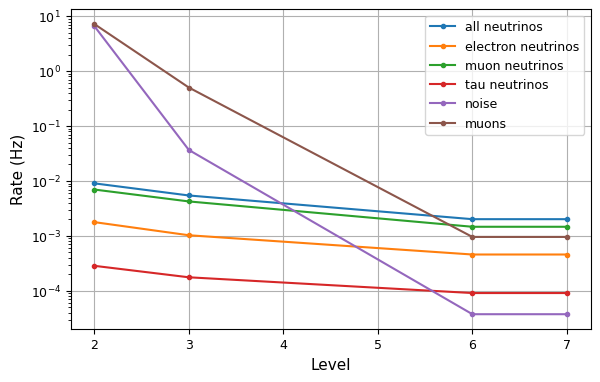

In [14]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))

axs.plot(levels,all_neutrino_rates,'.-',label='all neutrinos')
axs.plot(levels,electron_neutrino_rates,'.-',label='electron neutrinos')
axs.plot(levels,muon_neutrino_rates,'.-',label='muon neutrinos')
axs.plot(levels,tau_neutrino_rates,'.-',label='tau neutrinos')
axs.plot(levels,noise_rates,'.-',label='noise')
axs.plot(levels,muon_rates,'.-',label='muons')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Level')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/peter/workspace/analyses/Multiclassification_track_cascade_neutrinos/Peter_Thesis_Hand_Over/Plots/OscNext_rates_per_level/"
fig.savefig(outdir+ 'Osc_next_selection_rates.png', format='png', bbox_inches='tight')


In [15]:
with sql.connect(indir_db_MC_lvl7_muons) as con:
        query = f"""
        SELECT
            event_no, osc_weight, L7_MuonClassifier_FullSky_ProbNu, energy_retro, position_x_retro, position_y_retro, position_z_retro, zenith_retro
        FROM 
            retro
        """
        Last_lvl7_muons = read_sql(query,con)

with sql.connect(indir_db_MC_lvl7_noise) as con:
        query = f"""
        SELECT
            event_no, osc_weight, L7_MuonClassifier_FullSky_ProbNu, energy_retro, position_x_retro, position_y_retro, position_z_retro, zenith_retro
        FROM 
            retro
        """
        Last_lvl7_noise = read_sql(query,con)

with sql.connect(indir_db_MC_lvl7) as con:
        query = f"""
        SELECT
            event_no, osc_weight, L7_MuonClassifier_FullSky_ProbNu, energy_retro, position_x_retro, position_y_retro, position_z_retro, zenith_retro
        FROM 
            retro
        """
        Last_lvl7_neutrinos = read_sql(query,con)

In [ ]:
nr_electron_neutrino_i3_files_lvl7 = 602
nr_muon_neutrino_i3_files_lvl7 = 1518
nr_tau_neutrino_i3_files_lvl7 = 334
nr_noise_i3_files_lvl7 = 2030
nr_muon_i3_files_lvl7 = 2001

Last_lvl7_neutrinos['osc_weight'][Last_lvl7_neutrinos['event_no'].isin((electron_neutrino_event_nos_lvl7))] *= 1/nr_electron_neutrino_i3_files_lvl7
Last_lvl7_neutrinos['osc_weight'][Last_lvl7_neutrinos['event_no'].isin((muon_neutrino_event_nos_lvl7))] *= 1/nr_muon_neutrino_i3_files_lvl7
Last_lvl7_neutrinos['osc_weight'][Last_lvl7_neutrinos['event_no'].isin((tau_neutrino_event_nos_lvl7))] *= 1/nr_tau_neutrino_i3_files_lvl7
Last_lvl7_muons['osc_weight'] *= 1/nr_muon_i3_files_lvl7
Last_lvl7_noise['osc_weight'] *= 1/nr_noise_i3_files_lvl7

/tmp/ipykernel_5553/3638409080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Last_lvl7_neutrinos['osc_weight'][Last_lvl7_neutrinos['event_no'].isin((electron_neutrino_event_nos_lvl7))] *= 1/nr_electron_neutrino_i3_files_lvl7
/tmp/ipykernel_5553/3638409080.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Last_lvl7_neutrinos['osc_weight'][Last_lvl7_neutrinos['event_no'].isin((muon_neutrino_event_nos_lvl7))] *= 1/nr_muon_neutrino_i3_files_lvl7
/tmp/ipykernel_5553/3638409080.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [ ]:
cut_values = np.linspace(0,1,101)
rates_electron_neutrinos = []
rates_muon_neutrinos = []
rates_tau_neutrinos = []
rates_neutrinos = []
rates_muons = []
rates_noise= []

for cut in cut_values:
    print(cut)
    rates_neutrinos.append(np.sum(Last_lvl7_neutrinos['osc_weight'][Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>cut]))
    rates_electron_neutrinos.append(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>cut)&(Last_lvl7_neutrinos['event_no'].isin(electron_neutrino_event_nos_lvl7))]))
    rates_muon_neutrinos.append(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>cut)&(Last_lvl7_neutrinos['event_no'].isin(muon_neutrino_event_nos_lvl7))]))
    rates_tau_neutrinos.append(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>cut)&(Last_lvl7_neutrinos['event_no'].isin(tau_neutrino_event_nos_lvl7))]))
    rates_muons.append(np.sum(Last_lvl7_muons['osc_weight'][Last_lvl7_muons['L7_MuonClassifier_FullSky_ProbNu']>cut]))
    rates_noise.append(np.sum(Last_lvl7_noise['osc_weight'][Last_lvl7_noise['L7_MuonClassifier_FullSky_ProbNu']>cut]))

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0


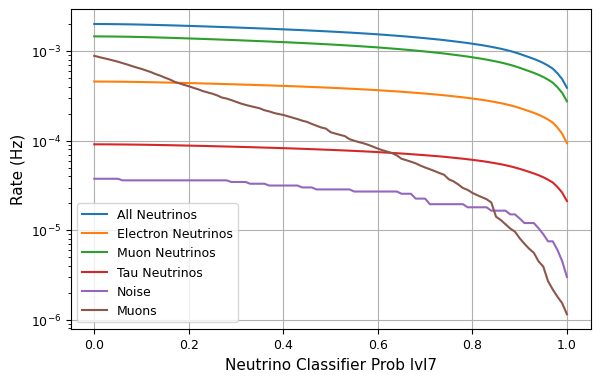

In [ ]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))

axs.plot(cut_values,np.array(rates_neutrinos),'-',label='All Neutrinos')
axs.plot(cut_values,np.array(rates_electron_neutrinos),'-',label='Electron Neutrinos')
axs.plot(cut_values,np.array(rates_muon_neutrinos),'-',label='Muon Neutrinos')
axs.plot(cut_values,np.array(rates_tau_neutrinos),'-',label='Tau Neutrinos')
axs.plot(cut_values,np.array(rates_noise),'-',label='Noise')
axs.plot(cut_values,np.array(rates_muons),'-',label='Muons')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino Classifier Prob lvl7')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/peter/workspace/analyses/Multiclassification_track_cascade_neutrinos/Peter_Thesis_Hand_Over/Plots/OscNext_rates_per_level/"
fig.savefig(outdir+ 'Osc_next_selection_rates_last_lvl7_classifier.png', format='png', bbox_inches='tight')

In [ ]:
index = 80
print(cut_values[index])
print(rates_neutrinos[index])
print(rates_electron_neutrinos[index])
print(rates_muon_neutrinos[index])
print(rates_tau_neutrinos[index])
print(rates_noise[index])
print(rates_muons[index])

0.8
0.0012128956141172211
0.00029618635864882395
0.0008555349406006593
6.117431486773661e-05
1.8052871658075457e-05
2.613918185935112e-05


In [ ]:
rates_total  = rates_neutrinos[index] + rates_noise[index] + rates_muons[index]
print('total rate:',rates_total)

print('neutrinos percent:',rates_neutrinos[index]/rates_total*100)
print('Electron neutrinos percent:',rates_electron_neutrinos[index]/rates_total*100)
print('Muon neutrinos percent:',rates_muon_neutrinos[index]/rates_total*100)
print('Tau neutrinos percent:',rates_tau_neutrinos[index]/rates_total*100)
print('noise percent:',rates_noise[index]/rates_total*100)
print('mions percent:',rates_muons[index]/rates_total*100)

total rate: 0.0012570876676346477
neutrinos percent: 96.48456868560497
Electron neutrinos percent: 23.561312888076614
Muon neutrinos percent: 68.05690347837434
Tau neutrinos percent: 4.866352319153921
noise percent: 1.436086927178593
mions percent: 2.0793443872164414


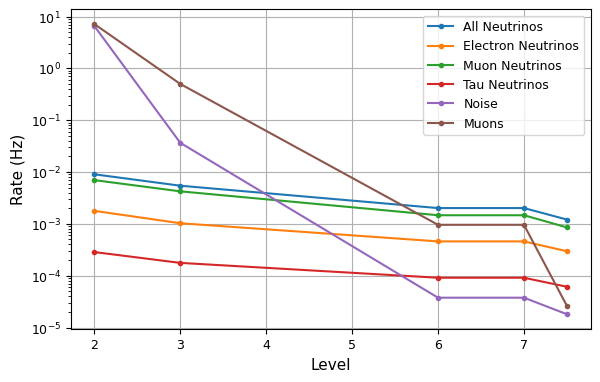

In [ ]:
index = 80 #cut at 0.8

levels = np.array([2,3,6,7,7.5])
all_neutrino_rates = np.array([lvl_2_DC_all_neutrinos_rate,lvl_3_all_neutrinos_rate,lvl_6_all_neutrinos_rate,lvl_7_all_neutrinos_rate,rates_neutrinos[index]])
electron_neutrino_rates = np.array([lvl_2_DC_electron_neutrinos_rate,lvl_3_electron_neutrinos_rate,lvl_6_electron_neutrinos_rate,lvl_7_electron_neutrinos_rate,rates_electron_neutrinos[index]])
muon_neutrino_rates = np.array([lvl_2_DC_muon_neutrinos_rate,lvl_3_muon_neutrinos_rate,lvl_6_muon_neutrinos_rate,lvl_7_muon_neutrinos_rate,rates_muon_neutrinos[index]])
tau_neutrino_rates = np.array([lvl_2_DC_tau_neutrinos_rate,lvl_3_tau_neutrinos_rate,lvl_6_tau_neutrinos_rate,lvl_7_tau_neutrinos_rate,rates_tau_neutrinos[index]])
muon_rates = np.array([lvl_2_DC_muon_rate,lvl_3_muon_rate,lvl_6_muon_rate,lvl_7_muon_rate,rates_muons[index]])
noise_rates = np.array([lvl_2_DC_noise_rate,lvl_3_noise_rate,lvl_6_noise_rate,lvl_7_noise_rate,rates_noise[index]])
total_rates = all_neutrino_rates+muon_rates+noise_rates
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))

axs.plot(levels,all_neutrino_rates,'.-',label='All Neutrinos')
axs.plot(levels,electron_neutrino_rates,'.-',label='Electron Neutrinos')
axs.plot(levels,muon_neutrino_rates,'.-',label='Muon Neutrinos')
axs.plot(levels,tau_neutrino_rates,'.-',label='Tau Neutrinos')
axs.plot(levels,noise_rates,'.-',label='Noise')
axs.plot(levels,muon_rates,'.-',label='Muons')
#axs.plot(levels,total_rates,'.-',label='Total MC')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Level')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/peter/workspace/analyses/Multiclassification_track_cascade_neutrinos/Peter_Thesis_Hand_Over/Plots/OscNext_rates_per_level/"
fig.savefig(outdir+ 'Osc_next_selection_rates_with_last_classifier.png', format='png', bbox_inches='tight')


In [ ]:
print(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>0.8) ]))
print(np.sum(Last_lvl7_muons['osc_weight'][(Last_lvl7_muons['L7_MuonClassifier_FullSky_ProbNu']>0.8) ]))
print(np.sum(Last_lvl7_noise['osc_weight'][(Last_lvl7_noise['L7_MuonClassifier_FullSky_ProbNu']>0.8) ]))

0.0012128956141172211
2.613918185935112e-05
1.8052871658075457e-05


In [ ]:
print(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_neutrinos['zenith_retro'])<0.3)]))
print(np.sum(Last_lvl7_muons['osc_weight'][(Last_lvl7_muons['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_muons['zenith_retro'])<0.3)]))
print(np.sum(Last_lvl7_noise['osc_weight'][(Last_lvl7_noise['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_noise['zenith_retro'])<0.3)]))

0.0008917571814905079
1.4320444111524738e-05
1.0530841800544016e-05


In [ ]:
print(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_neutrinos['zenith_retro'])<0.3) & (Last_lvl7_neutrinos['energy_retro']>5) & (Last_lvl7_neutrinos['energy_retro']<300)]))
print(np.sum(Last_lvl7_muons['osc_weight'][(Last_lvl7_muons['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_muons['zenith_retro'])<0.3)& (Last_lvl7_muons['energy_retro']>5) & (Last_lvl7_muons['energy_retro']<300)]))
print(np.sum(Last_lvl7_noise['osc_weight'][(Last_lvl7_noise['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_noise['zenith_retro'])<0.3)& (Last_lvl7_noise['energy_retro']>5) & (Last_lvl7_noise['energy_retro']<300)]))

0.0008176256087581538
1.4248317046880824e-05
1.0530841800544016e-05


In [ ]:
def calc_rho_36(x,y) :
    '''
    Radial distance from string 36 (approximately central within DeepCore)
    '''
    return np.sqrt( (x-46.29) ** 2 + (y+34.88) ** 2 )

In [ ]:
Last_lvl7_neutrinos['rho'] = calc_rho_36(Last_lvl7_neutrinos['position_x_retro'].values,Last_lvl7_neutrinos['position_y_retro'].values)
Last_lvl7_muons['rho'] = calc_rho_36(Last_lvl7_muons['position_x_retro'].values,Last_lvl7_muons['position_y_retro'].values)
Last_lvl7_noise['rho'] = calc_rho_36(Last_lvl7_noise['position_x_retro'].values,Last_lvl7_noise['position_y_retro'].values)

In [ ]:
print(np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_neutrinos['zenith_retro'])<0.3) & (Last_lvl7_neutrinos['energy_retro']>5) & (Last_lvl7_neutrinos['energy_retro']<300) & (Last_lvl7_neutrinos['position_z_retro']>-500) & (Last_lvl7_neutrinos['position_z_retro']<-200)& (Last_lvl7_neutrinos['rho']<300)]))
print(np.sum(Last_lvl7_muons['osc_weight'][(Last_lvl7_muons['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_muons['zenith_retro'])<0.3)& (Last_lvl7_muons['energy_retro']>5) & (Last_lvl7_muons['energy_retro']<300)& (Last_lvl7_muons['position_z_retro']>-500) & (Last_lvl7_muons['position_z_retro']<-200)& (Last_lvl7_muons['rho']<300)]))
print(np.sum(Last_lvl7_noise['osc_weight'][(Last_lvl7_noise['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_noise['zenith_retro'])<0.3)& (Last_lvl7_noise['energy_retro']>5) & (Last_lvl7_noise['energy_retro']<300)& (Last_lvl7_noise['position_z_retro']>-500) & (Last_lvl7_noise['position_z_retro']<-200)& (Last_lvl7_noise['rho']<300)]))

0.0007938320810950057
1.3929514676150414e-05
1.0530841800544016e-05


In [ ]:
neutrino_final = np.sum(Last_lvl7_neutrinos['osc_weight'][(Last_lvl7_neutrinos['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_neutrinos['zenith_retro'])<0.3) & (Last_lvl7_neutrinos['energy_retro']>5) & (Last_lvl7_neutrinos['energy_retro']<300) & (Last_lvl7_neutrinos['position_z_retro']>-500) & (Last_lvl7_neutrinos['position_z_retro']<-200)& (Last_lvl7_neutrinos['rho']<300)])
muon_final = np.sum(Last_lvl7_muons['osc_weight'][(Last_lvl7_muons['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_muons['zenith_retro'])<0.3)& (Last_lvl7_muons['energy_retro']>5) & (Last_lvl7_muons['energy_retro']<300)& (Last_lvl7_muons['position_z_retro']>-500) & (Last_lvl7_muons['position_z_retro']<-200)& (Last_lvl7_muons['rho']<300)])
noise_final = np.sum(Last_lvl7_noise['osc_weight'][(Last_lvl7_noise['L7_MuonClassifier_FullSky_ProbNu']>0.8) & (np.cos(Last_lvl7_noise['zenith_retro'])<0.3)& (Last_lvl7_noise['energy_retro']>5) & (Last_lvl7_noise['energy_retro']<300)& (Last_lvl7_noise['position_z_retro']>-500) & (Last_lvl7_noise['position_z_retro']<-200)& (Last_lvl7_noise['rho']<300)])
total_final = neutrino_final+muon_final+ noise_final

print(neutrino_final/total_final*100)
print(muon_final/total_final*100)
print(noise_final/total_final*100)

97.01080501864577
1.7022660893074533
1.2869288920467736


In [ ]:
print(total_final)

0.0008182924375717001
